In [1]:
using Fretem, Potential, PyPlot, Printf

### Part 1: Get collocation points and integration kernel for whole domain

In [2]:
Nh = 64    # The number of Spectral element
Np = 4     # The order of polynomial which used to interpolate and integration

# Define Physical Domain
xratio = 10 # unit: angstrom
xavg = 50   # unit: angstrom

x, w, Ldx, L = getLagrange(Np, xratio/Nh)
e_norm = x[end] - x[1]
interpo_xs = x .+ x[end]

N, xref, w0, Ldx, w = get_fem_xref_weights_basis(Nh, Np, xratio, xavg);

### Part 2: Set $V(x)$ and $p_{eq}(x)$ and $D$

In [3]:
k_ref = 1 # unit: kcal/mol/angstrom^2
Vref = harmonic_well_k_mean(xref, k_ref, xavg)
rho_eq = get_rhoeq(Vref, w0)
peq = rho_eq .* rho_eq
D = 7.75e10; # Diffusion coefficient, unit: angstrom^2 s-1

### Part 3: Get eigenvalues and eigenvectors

In [4]:
Nv = 36 # Number of eigenvectors
LQ, Qx, rho = fem_solve_eigen_by_pref(Nh, Np, xratio, xavg, peq, D, Nv);

### Part 4: Set function of plot

In [29]:
function plot_x_Qx_lambda(idx_eigvector, LQ, Qx, ax)
    lambda = LQ[idx_eigvector] 
    tau = 1 / lambda
    title = @sprintf "\$ \\lambda_{%d}=%.2E \$  \$ \\tau=%.2E \$" idx_eigvector lambda tau 
    xlabel = "x position"
    ylabel = @sprintf "\$ \\psi_{%d}(x) \$" idx_eigvector
    
    ax.plot(xref, Qx[:, idx_eigvector])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
end

plot_x_Qx_lambda (generic function with 1 method)

### Part 5: Single Plot

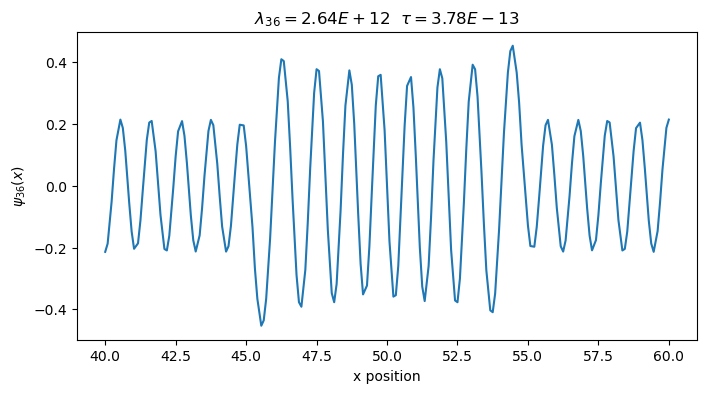

In [30]:
idx_eigvector = 36  # 1 is rho_eq
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
plot_x_Qx_lambda(idx_eigvector, LQ, Qx, ax)
plt.show()

### Part 6: Multiple plot

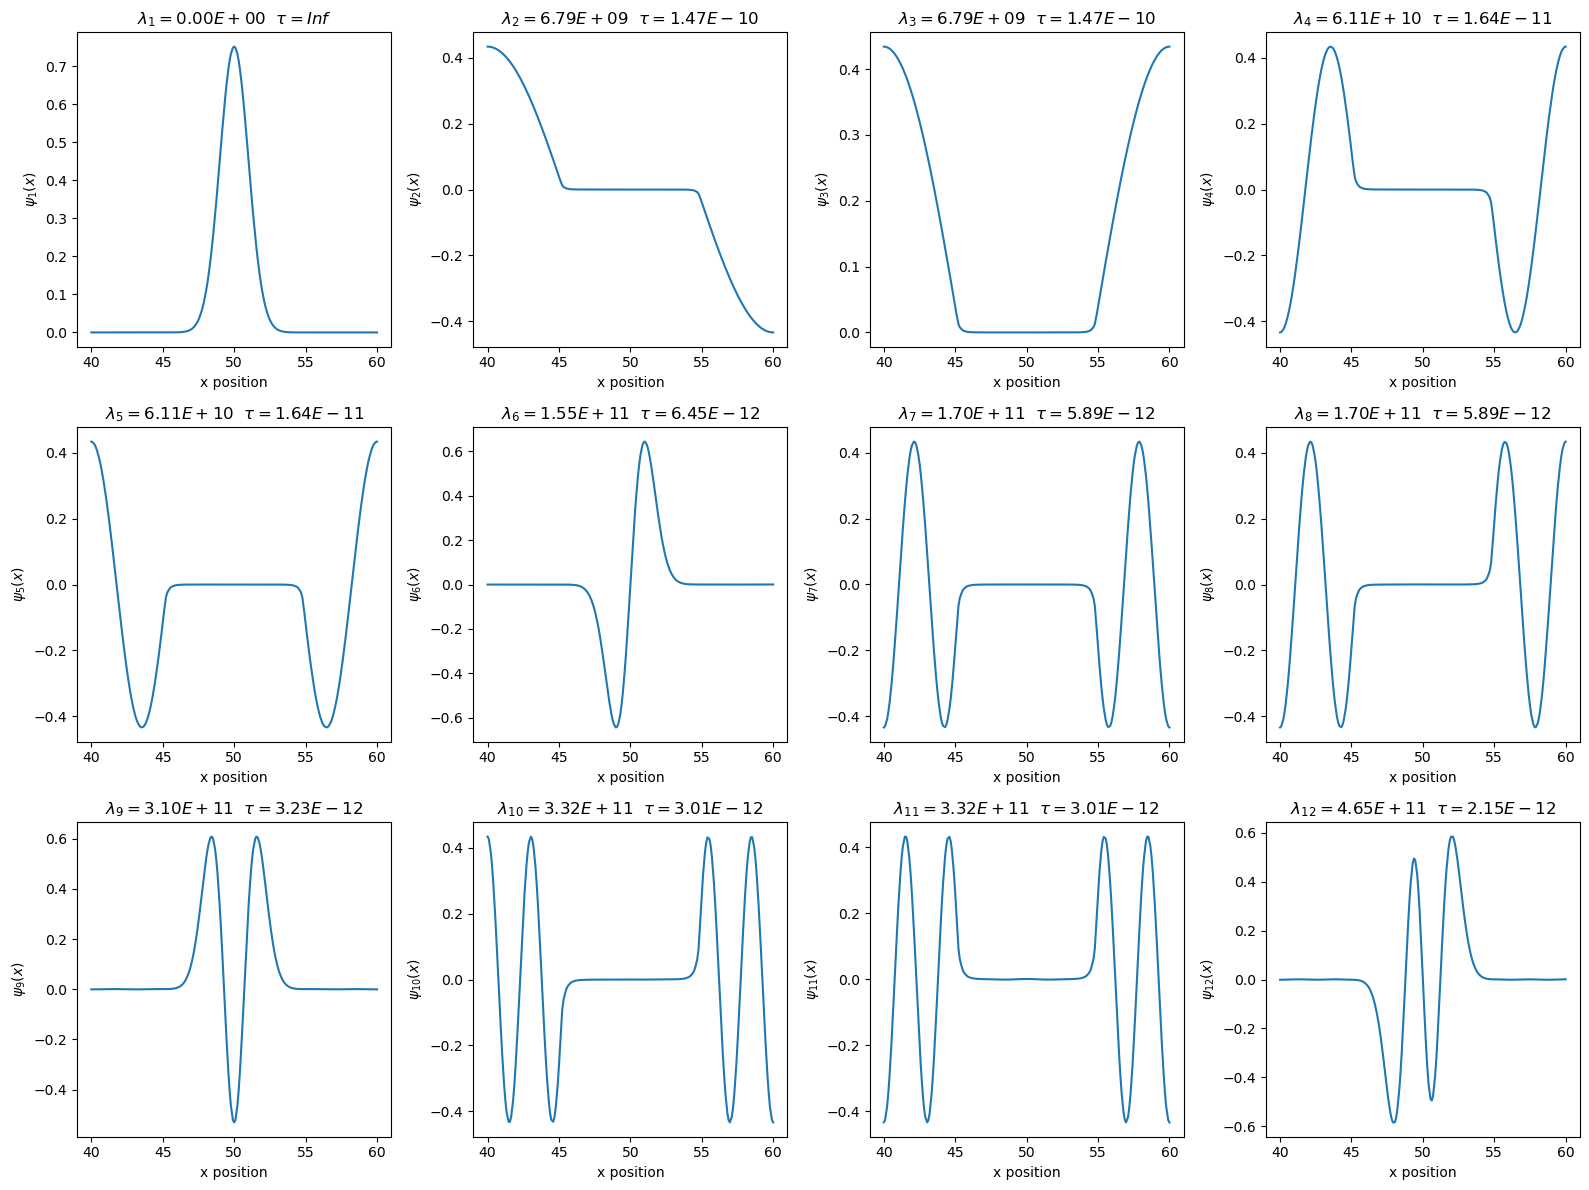

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

idx_eigvector = 1
for row_id=1:3
    for col_id = 1:4
        ax = axes[row_id, col_id]
        plot_x_Qx_lambda(idx_eigvector, LQ, Qx, ax)
        idx_eigvector += 1
    end
end
plt.tight_layout()
#plt.savefig("eigv_1_12.png", dpi=150)
plt.show()

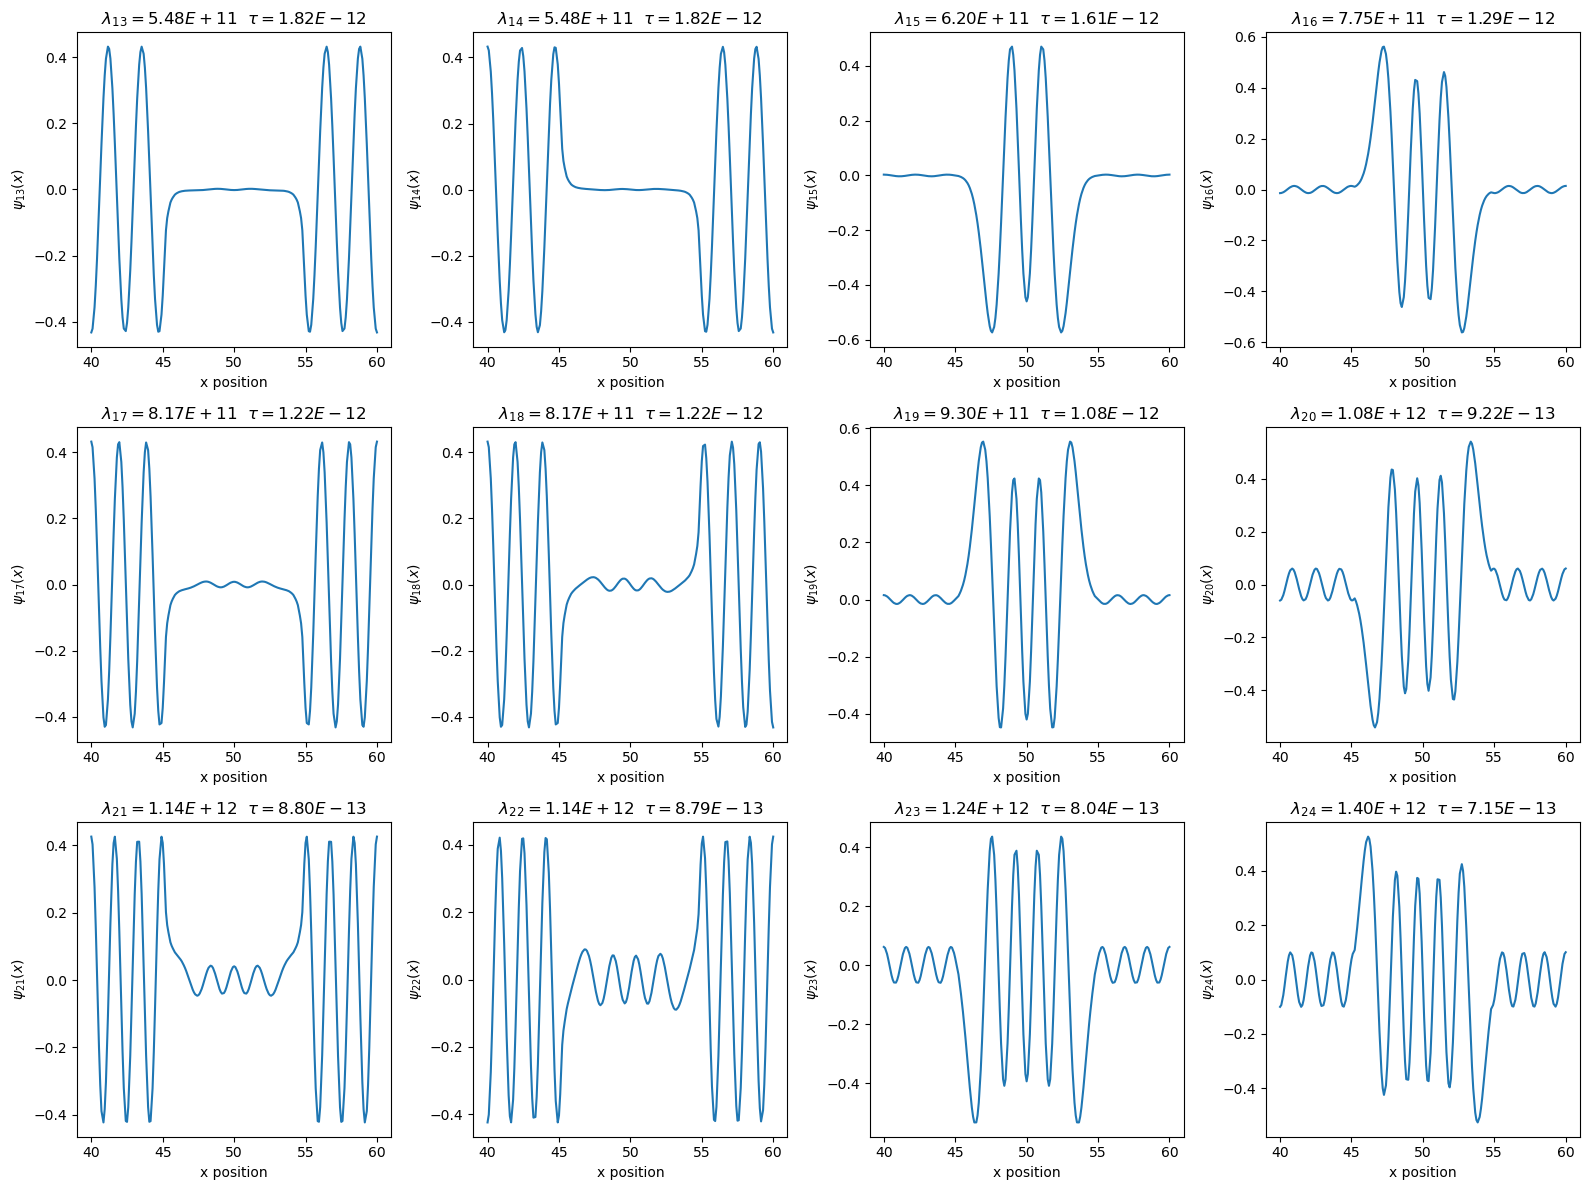

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

idx_eigvector = 13
for row_id=1:3
    for col_id = 1:4
        ax = axes[row_id, col_id]
        plot_x_Qx_lambda(idx_eigvector, LQ, Qx, ax)
        idx_eigvector += 1
    end
end
plt.tight_layout()
#plt.savefig("eigv_13_24.png", dpi=150)
plt.show()

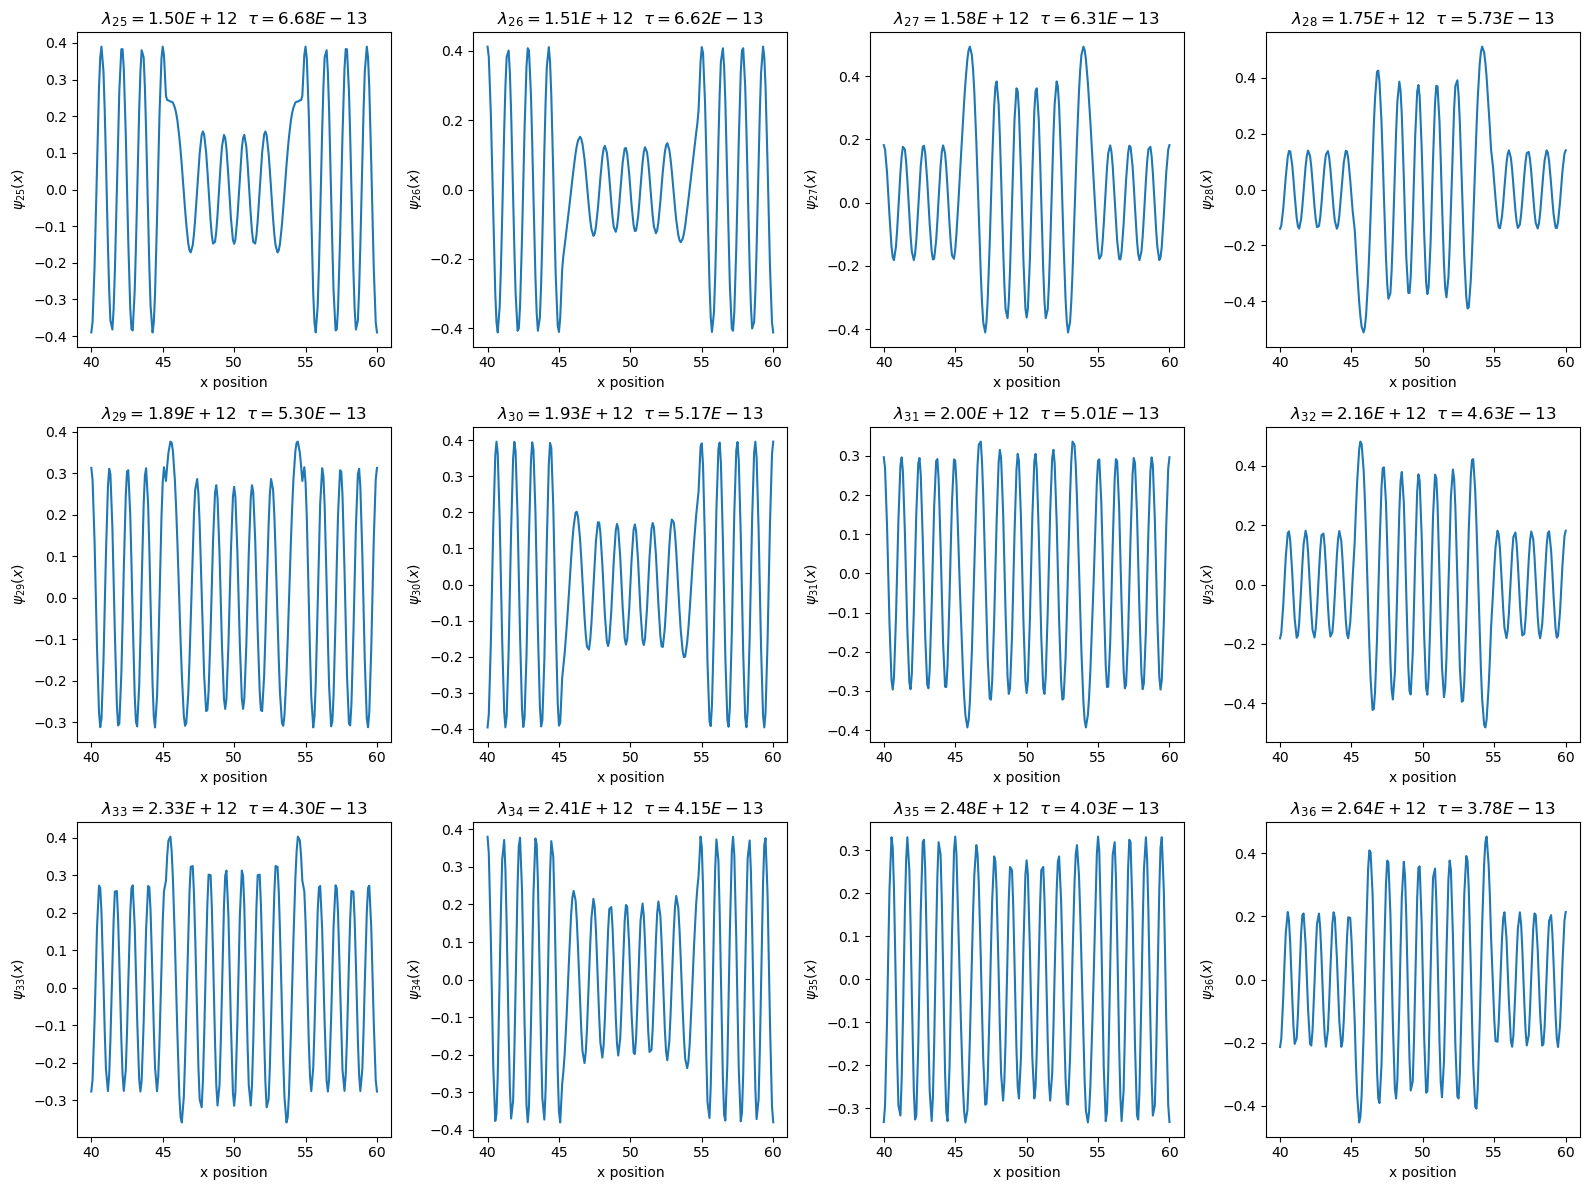

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))

idx_eigvector = 25
for row_id=1:3
    for col_id = 1:4
        ax = axes[row_id, col_id]
        plot_x_Qx_lambda(idx_eigvector, LQ, Qx, ax)
        idx_eigvector += 1
    end
end
plt.tight_layout()
#plt.savefig("eigv_25_36.png", dpi=150)
plt.show()